In [120]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
#Load data

df_2019 = pd.read_csv('data/mini-lottowyniki 2019.csv', sep=';')
df_2020 = pd.read_csv('data/mini-lottowyniki 2020.csv', sep=';')
df_2021 = pd.read_csv('data/mini-lottowyniki 2021.csv', sep=';')
df_2022 = pd.read_csv('data/mini-lottowyniki 2022.csv', sep=';')

In [108]:
print(df_2019.head(5))

     id   day  month    year    N1    N2    N3    N4    N5
0  4865  31.0   12.0  2019.0   6.0   8.0  12.0  31.0  40.0
1  4864  30.0   12.0  2019.0  13.0  21.0  33.0  35.0  41.0
2  4863  29.0   12.0  2019.0   1.0   5.0   9.0  14.0  35.0
3  4862  28.0   12.0  2019.0   5.0  12.0  20.0  27.0  35.0
4  4861  27.0   12.0  2019.0   1.0   4.0  10.0  14.0  23.0


In [109]:
#Mini lotto numbers are from 1 to 42 
# quantity = np.array([np.arange(1,43,1, dtype=int), np.zeros(len(np.arange(1,43,1)))])
# quantity = np.transpose(quantity)

In [113]:
available_numbers = np.arange(1,43,1)
columns = ['N1', 'N2', 'N3', 'N4', 'N5']

df_all_quantity = pd.DataFrame(available_numbers, columns = ['numbers'])

for column in columns:
    quantity = np.array([np.arange(1,43,1, dtype=int), np.zeros(len(np.arange(1,43,1)))])
    quantity = np.transpose(quantity)
    for i in df_2020[column]:
        for number in available_numbers:
            if i == number:
                quantity[number-1][1] = quantity[number-1][1] + 1 
    df_quantity = pd.DataFrame(quantity, columns = ['numbers', column])  
    df_all_quantity[column] = df_quantity[column]

In [114]:
print(df_all_quantity.head(10))

   numbers    N1    N2    N3   N4   N5
0        1  42.0   0.0   0.0  0.0  0.0
1        2  36.0   8.0   0.0  0.0  0.0
2        3  37.0   6.0   1.0  0.0  0.0
3        4  28.0  14.0   2.0  0.0  0.0
4        5  31.0  12.0   2.0  0.0  0.0
5        6  25.0  12.0   3.0  0.0  0.0
6        7  30.0  11.0   2.0  0.0  0.0
7        8  16.0  14.0   1.0  0.0  0.0
8        9  14.0  27.0  13.0  2.0  0.0
9       10  16.0  23.0   6.0  1.0  0.0


In [115]:
df_all_quantity['sum_all'] = df_all_quantity['N1'] + df_all_quantity['N2'] + df_all_quantity['N3'] + df_all_quantity['N4'] + df_all_quantity['N5']

In [118]:
print(df_all_quantity.sort_values(by=['sum_all'], ascending=False).head(10))

    numbers    N1    N2    N3    N4    N5  sum_all
8         9  14.0  27.0  13.0   2.0   0.0     56.0
19       20   3.0  17.0  18.0  15.0   3.0     56.0
35       36   0.0   1.0   1.0  28.0  25.0     55.0
11       12  13.0  22.0  16.0   2.0   0.0     53.0
41       42   0.0   0.0   0.0   0.0  51.0     51.0
30       31   0.0   0.0  12.0  21.0  18.0     51.0
29       30   0.0   4.0  11.0  24.0  11.0     50.0
12       13  17.0  16.0  15.0   2.0   0.0     50.0
13       14  11.0  26.0  10.0   2.0   0.0     49.0
34       35   0.0   0.0   6.0  20.0  21.0     47.0


Text(0.5, 0, 'Numbers')

<Figure size 432x288 with 0 Axes>

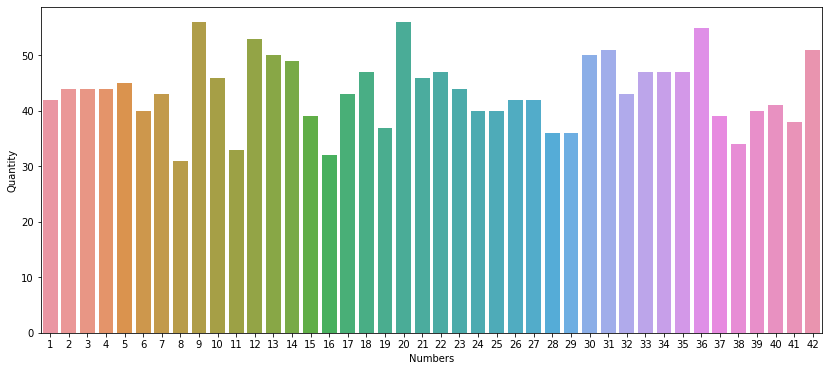

In [129]:
plt.figure(1)
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='numbers', y="sum_all", data=df_all_quantity)
plt.ylabel("Quantity")
plt.xlabel("Numbers")